# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [15]:
#Cargar datos

file_path = "data/day_1_income_vs_consumption.csv"
df = pd.read_csv(file_path)


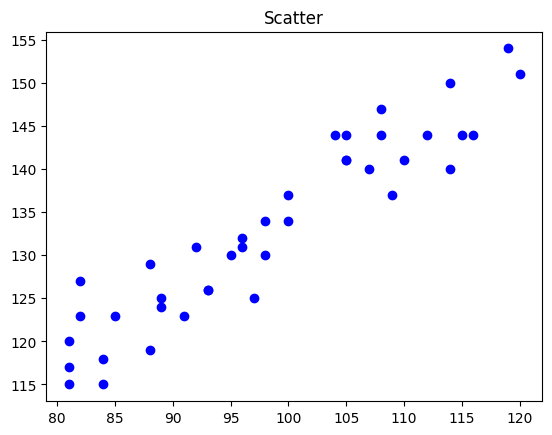

In [16]:
# Gráfico de dispersion

plt.scatter(df['income'], df['consumption'], color='blue')
plt.title("Scatter")

plt.show()


In [17]:
# Correlación de Pearsons

correlation = df['income'].corr(df['consumption'])
print(f"Pearson's correlation: {correlation}")

Pearson's correlation: 0.9390731944060711


In [18]:
# Modelo de regresión lineal

x = df[['income']]
y = df['consumption']

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [19]:
# Resumen del modelo

x_with_const = sm.add_constant(x)
ols_model = sm.OLS(y, x_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     283.6
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.24e-19
Time:                        07:04:38   Log-Likelihood:                -108.41
No. Observations:                  40   AIC:                             220.8
Df Residuals:                      38   BIC:                             224.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.1334      5.014      9.798      0.0

In [20]:
# Coeficientes del modelo

print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_[0])

Intercept:  49.133413704883026
Slope:  0.8527360070677883


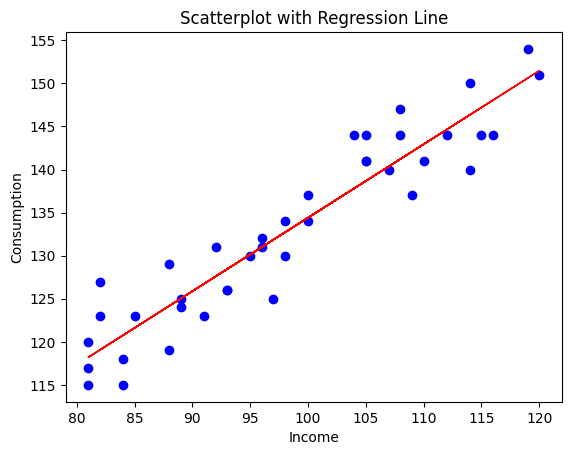

In [23]:
# linea de regresión del gráfico


plt.scatter(df['income'], df['consumption'], color='blue')
plt.plot(df['income'], model.predict(x), color='red', linewidth=1)
plt.title("Scatterplot with Regression Line")
plt.xlabel("Income")
plt.ylabel("Consumption")
plt.show()

In [24]:
# 8. Intervalos de confianza
confidence_intervals = ols_model.conf_int(alpha=0.05)
print("Confidence intervals:\n", confidence_intervals)

Confidence intervals:
                 0          1
const   38.982102  59.284725
income   0.750237   0.955235


In [25]:
# 9. Predicciones
new_values = pd.DataFrame({'income': [150, 130, 125]})
point_predictions = model.predict(new_values)
print("Point predictions:\n", point_predictions)

Point predictions:
 [177.04381477 159.98909462 155.72541459]


In [26]:
# Predicciones con intervalos de confianza
predictions_with_ci = ols_model.get_prediction(sm.add_constant(new_values)).summary_frame(alpha=0.05)
print("Predictions with confidence intervals:\n", predictions_with_ci)

Predictions with confidence intervals:
          mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  177.043815  2.680889     171.616639     182.470991    167.741414   
1  159.989095  1.707693     156.532050     163.446139    151.680570   
2  155.725415  1.472728     152.744032     158.706797    147.603280   

   obs_ci_upper  
0    186.346216  
1    168.297619  
2    163.847549  


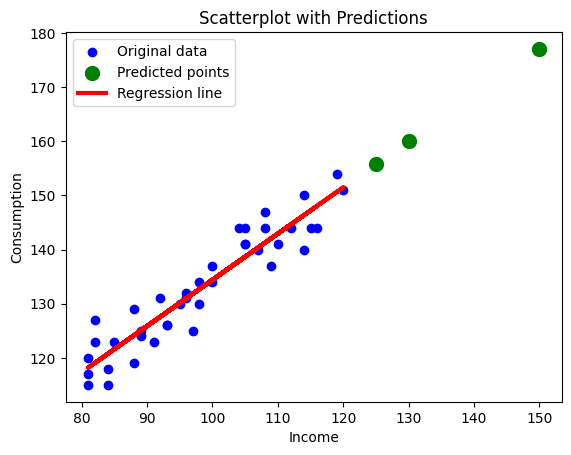

In [28]:
# Gráfico con predicciones
plt.scatter(df['income'], df['consumption'], color='blue', label='Original data')
plt.scatter(new_values['income'], point_predictions, color='green', s=100, label='Predicted points')
plt.plot(df['income'], model.predict(x), color='red', linewidth=3, label='Regression line')
plt.title("Scatterplot with Predictions")
plt.xlabel("Income")
plt.ylabel("Consumption")
plt.legend()
plt.show()

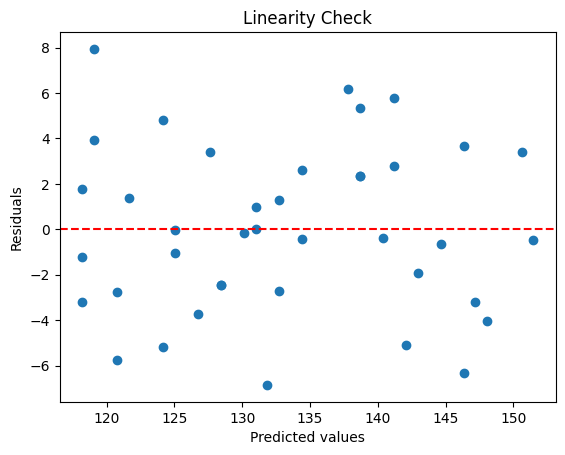

In [29]:
# SUPUESTOS

## 1. Linealidad
residuals = y - model.predict(x)
plt.scatter(model.predict(x), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linearity Check")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

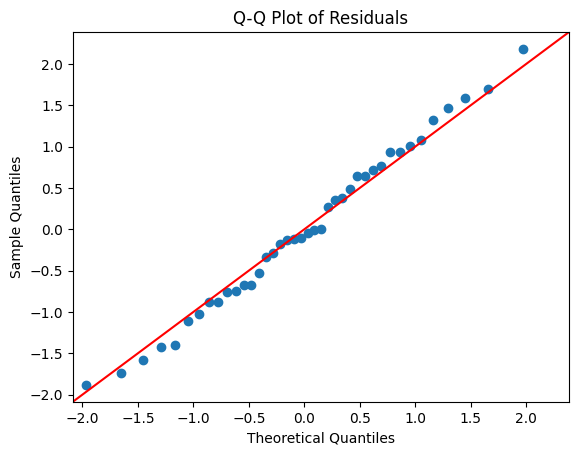

In [30]:
## 2. Normalidad de los residuos
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

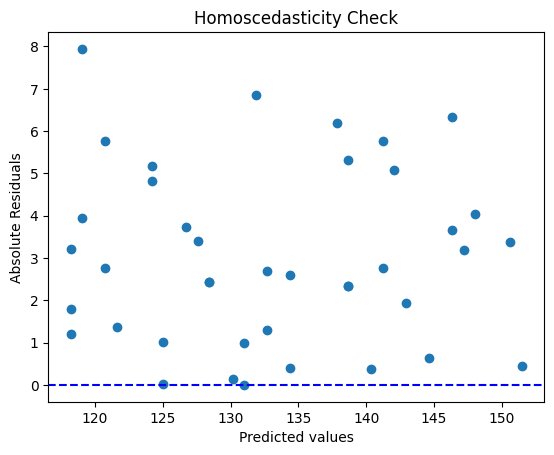

In [31]:
## 3. Homocedasticidad
plt.scatter(model.predict(x), np.abs(residuals))
plt.axhline(0, color='blue', linestyle='--')
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted values")
plt.ylabel("Absolute Residuals")
plt.show()

In [32]:
## 4. Independencia de los residuos (Durbin-Watson Test)
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 1.9272161565731434
